In [16]:
# Imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

plt.rcParams['figure.figsize'] = (15.0, 8.0) # set default size of plots
plt.rcParams['figure.facecolor'] = 'white'

pd.set_option('display.max_rows', None)

matplotlib.rcParams.update({'font.size': 15})

In [17]:
def formatForLatex(n):
    roundedAsString = str(round(n, 2))
    if "." in roundedAsString:
        roundedAsString = roundedAsString.rstrip("0")
        roundedAsString = roundedAsString.rstrip(".")
    return f"{roundedAsString}"

In [22]:
roundtrip_latencies = pd.read_csv("../logs/latencies/native-roundtrip.csv", names = ["Enter", "Leave"])

roundtrip_latencies_mean = roundtrip_latencies.median() #stats.gmean(roundtrip_latencies,axis=0)
roundtrip_latencies_stddev = roundtrip_latencies.std()

print("mean:", roundtrip_latencies_mean, "stddev", roundtrip_latencies_stddev)

mean: Enter    18.0
Leave    13.0
dtype: float64 stddev Enter    4.362768
Leave    2.058503
dtype: float64


/tmp/ipykernel_1099820/2668349537.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(roundtrip_latencies, labels = ['Enter', 'Leave'])


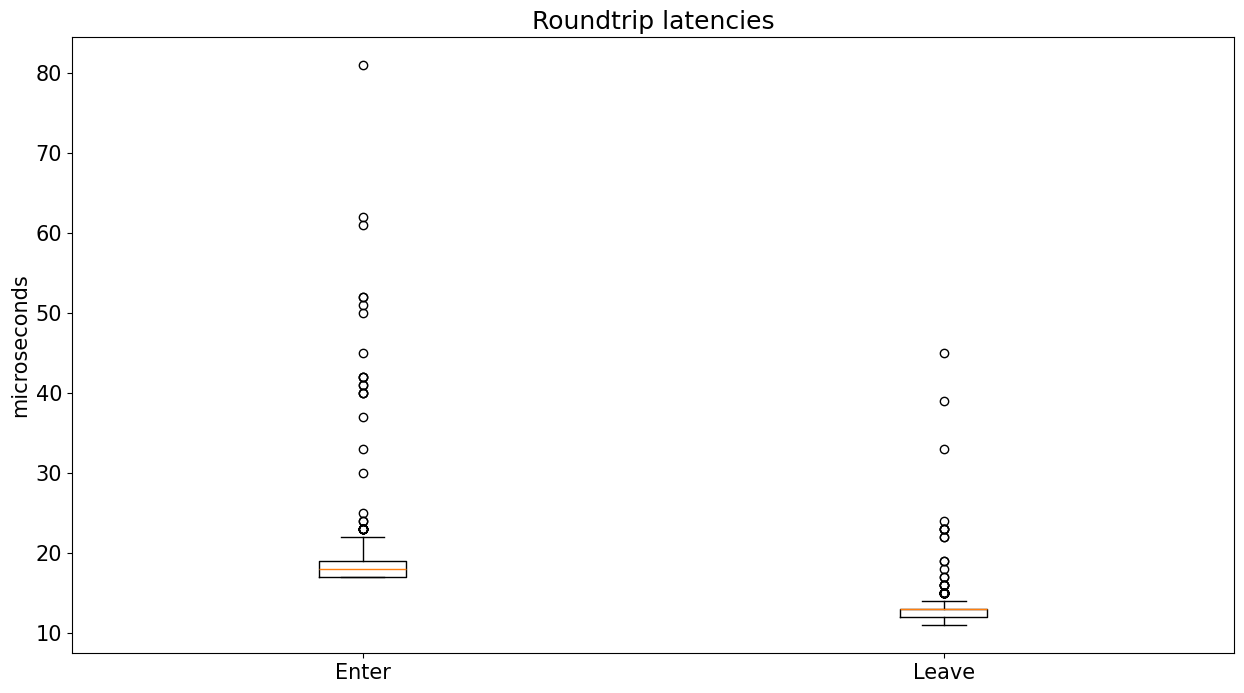

In [23]:
fig, ax = plt.subplots()
ax.set_title('Roundtrip latencies')
ax.set_ylabel('microseconds')

ax.boxplot(roundtrip_latencies, labels = ['Enter', 'Leave'])
plt.show()

In [20]:
time_latencies = pd.DataFrame()

# Omitted because < 1 microsec
#time_latencies["NativeCaTime"] = pd.read_csv("../logs/latencies/native-catime.csv", names = ["time"])
#time_latencies["WasmCaTime"] = pd.read_csv("../logs/latencies/wasm-catime.csv", names = ["time"])
time_latencies["NativeTaTime"] = pd.read_csv("../logs/latencies/native-tatime.csv", names = ["time"])
time_latencies["WasmTaTime"] = pd.read_csv("../logs/latencies/wasm-tatime.csv", names = ["time"])

time_latencies

FileNotFoundError: [Errno 2] No such file or directory: '../logs/latencies/wasm-tatime.csv'

In [ ]:
time_latencies_mean = time_latencies.median() #stats.gmean(time_latencies,axis=0)
time_latencies_stddev = time_latencies.std()

time_latencies_mean

NativeTaTime    9.0
WasmTaTime      NaN
dtype: object

/tmp/ipykernel_1099820/4117834167.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(time_latencies, labels = ['native-tee', 'wasm-tee'])
/opt/watz/benchmarks/latencies/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1277: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/watz/benchmarks/latencies/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1284: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/watz/benchmarks/latencies/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1292: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/watz/benchmarks/latencies/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1293: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


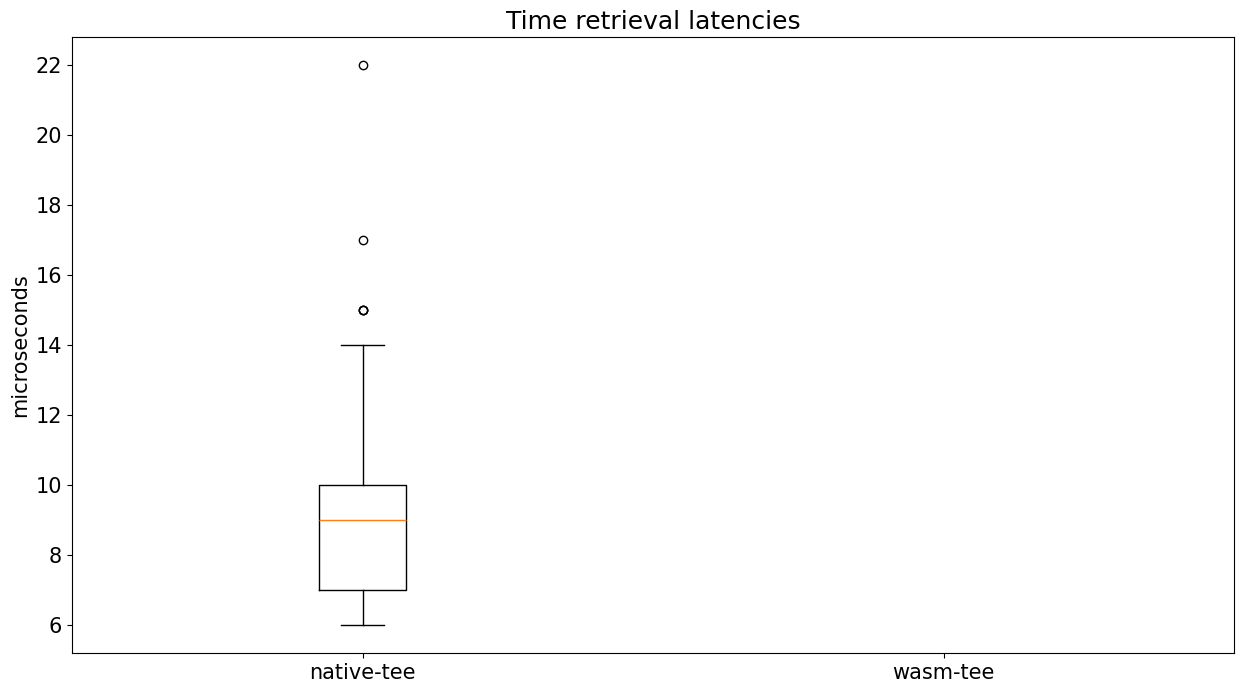

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Time retrieval latencies')
ax.set_ylabel('microseconds')

ax.boxplot(time_latencies, labels = ['native-tee', 'wasm-tee'])
plt.show()

In [ ]:
# Export CSV
#
# Files generated:
# - roundtrip_formatted.csv
# - time_formatted.csv
#
# File format: experiment_name, mean, stddev

def export_to_file(filename, dataset, dataset_mean, dataset_stddev):
    file = pd.DataFrame(columns = ["experiment_name", "mean", "stddev"])
    
    i = 0
    for column_name in dataset:
        file.loc[i] = [column_name, dataset_mean[i], dataset_stddev[i]]
        i += 1
        
    display(file)
    file.to_csv(filename, index=False)
    
export_to_file('../logs/latencies/roundtrip_formatted.csv', roundtrip_latencies, 
                         roundtrip_latencies_mean, roundtrip_latencies_stddev)
export_to_file('../logs/latencies/time_formatted.csv', time_latencies, 
                         time_latencies_mean, time_latencies_stddev)

/tmp/ipykernel_1099820/4008878428.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file.loc[i] = [column_name, dataset_mean[i], dataset_stddev[i]]
/tmp/ipykernel_1099820/4008878428.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file.loc[i] = [column_name, dataset_mean[i], dataset_stddev[i]]


,experiment_name,mean,stddev
0,Enter,1.757945e+15,3.986966
1,Leave,-1.757945e+15,2.531187


/tmp/ipykernel_1099820/4008878428.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file.loc[i] = [column_name, dataset_mean[i], dataset_stddev[i]]
/tmp/ipykernel_1099820/4008878428.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file.loc[i] = [column_name, dataset_mean[i], dataset_stddev[i]]


,experiment_name,mean,stddev
0,NativeTaTime,9.0,1.957276
1,WasmTaTime,NaN,NaN


In [ ]:
# Export LaTeX

def export_to_latex(filename, prefix, dataset, dataset_mean, dataset_stddev):
    f = open(filename, "w")
    
    i = 0
    for column_name in dataset:
        f.write(f"\\def\\bm{prefix}{column_name}Mean{{{formatForLatex(dataset_mean[i])}}}\n")
        f.write(f"\\def\\bm{prefix}{column_name}Stddev{{{formatForLatex(dataset_stddev[i])}}}\n")
        i += 1
    
    f.close()

export_to_latex('../logs/latencies/roundtrip.tex', 'LatenciesRoundtrip', roundtrip_latencies,
                       roundtrip_latencies_mean, roundtrip_latencies_stddev)
export_to_latex('../logs/latencies/time.tex', 'LatenciesTime', time_latencies, 
                         time_latencies_mean, time_latencies_stddev)

/tmp/ipykernel_1099820/2936710140.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f.write(f"\\def\\bm{prefix}{column_name}Mean{{{formatForLatex(dataset_mean[i])}}}\n")
/tmp/ipykernel_1099820/2936710140.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f.write(f"\\def\\bm{prefix}{column_name}Stddev{{{formatForLatex(dataset_stddev[i])}}}\n")
